In [1]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi
import datetime
import hvplot.pandas
import matplotlib.pyplot as plt
from MCForecastTools import MCSimulation


In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

Python-dotenv could not parse statement starting at line 1


In [3]:
# Set Alpaca API key and secret key
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [4]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [5]:
# Timeframes for day, year, 3 year, 5 year
timeframe = "1D"

today_date = str(datetime.datetime.now()).split()[0]
one_year_ago = str(datetime.datetime.now() - datetime.timedelta(days=1*365)).split()[0]
three_year_ago = str(datetime.datetime.now() - datetime.timedelta(days=3*365)).split()[0]
five_year_ago = str(datetime.datetime.now() - datetime.timedelta(days=5*365)).split()[0]
today_date, one_year_ago, three_year_ago, five_year_ago

('2021-02-24', '2020-02-25', '2018-02-25', '2016-02-26')

In [6]:
# Set start and end datetimes of 5 years from Today
start_date = pd.Timestamp(five_year_ago, tz="America/New_York").isoformat()
end_date = pd.Timestamp(today_date, tz="America/New_York").isoformat()
start_date, end_date

('2016-02-26T00:00:00-05:00', '2021-02-24T00:00:00-05:00')

In [7]:
# PULL ALL DATA FROM ALPACA, SET DATAFRAMES BASED ON ASSET TYPE

In [8]:
#Set ticker for SPY Portfolio
spy_ticker = ['SPY']

In [9]:
# Get 5 year's worth of historical data for SPY Portfolio
spy_df = api.get_barset(
    spy_ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

spy_df

SPY                                    
                             open      high     low   close    volume
time                                                                 
2020-10-01 00:00:00-04:00  337.69  338.7400  335.01  337.03  77057063
2020-10-02 00:00:00-04:00  331.70  337.0126  331.19  333.87  72797429
2020-10-05 00:00:00-04:00  336.06  339.9600  336.01  339.73  38540997
2020-10-06 00:00:00-04:00  339.92  342.1700  334.38  334.94  74231873
2020-10-07 00:00:00-04:00  338.12  341.6300  338.09  340.73  40579189
...                           ...       ...     ...     ...       ...
2021-02-18 00:00:00-05:00  389.59  391.5150  387.74  390.75  52370380
2021-02-19 00:00:00-05:00  392.07  392.3800  389.55  390.02  66794115
2021-02-22 00:00:00-05:00  387.06  389.6200  386.74  387.11  56604869
2021-02-23 00:00:00-05:00  384.66  388.9450  380.20  387.50  98333278
2021-02-24 00:00:00-05:00  386.33  392.2300  385.27  391.76  64527459

[100 rows x 5 columns]

In [10]:
# Set tickers for Green Auto Portfolio
green_auto_tickers = ['TSLA', 'SBE', 'PLUG', 'F', 'GM', 'BLNK', 'QS', 'ALB']

In [11]:
# Get 5 year's worth of historical data for Green Auto Portfolio
green_auto_df = api.get_barset(
    green_auto_tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

green_auto_df

ALB                                        BLNK  \
                             open      high       low   close   volume   open   
time                                                                            
2020-10-01 00:00:00-04:00   90.00   90.9699   86.4700   86.73  2056590  10.66   
2020-10-02 00:00:00-04:00   85.44   91.0789   84.5700   89.29  1783989   9.90   
2020-10-05 00:00:00-04:00   91.26   95.8900   91.1400   94.77  2796290  11.00   
2020-10-06 00:00:00-04:00   96.28   96.9691   93.5200   93.78  2009249  11.24   
2020-10-07 00:00:00-04:00   96.00   97.9869   95.6000   96.68  1730383  11.00   
...                           ...       ...       ...     ...      ...    ...   
2021-02-18 00:00:00-05:00  150.48  151.2500  140.7300  141.46  3912746  45.75   
2021-02-19 00:00:00-05:00  144.76  156.9799  144.4950  155.93  3548466  45.67   
2021-02-22 00:00:00-05:00  154.14  159.8840  153.6016  156.49  2069371  44.89   
2021-02-23 00:00:00-05:00  150.21  155.2650  141.1400  154.61  2090921  38.35   
2021-02-24 00:00:00-05:00  155.00  162.1300  152.7900  160.90  1723739  39.06   

                                                            ...    SBE  \
                            high      low   close   volume  ...   open   
time                                                        ...          
2020-10-01 00:00:00-04:00  11.08  10.3000  10.630  4841646  ...  16.00   
2020-10-02 00:00:00-04:00  10.99   9.8700  10.855  3588317  ...  14.45   
2020-10-05 00:00:00-04:00  11.45  10.9600  11.070  2358839  ...  15.47   
2020-10-06 00:00:00-04:00  11.34  10.4100  10.800  3261997  ...  14.63   
2020-10-07 00:00:00-04:00  11.05  10.2000  10.315  3112918  ...  14.17   
...                          ...      ...     ...      ...  ...    ...   
2021-02-18 00:00:00-05:00  46.60  42.6800  44.480  6987318  ...  37.00   
2021-02-19 00:00:00-05:00  47.18  45.1000  46.100  4337416  ...  37.00   
2021-02-22 00:00:00-05:00  45.55  41.3600  42.200  6492258  ...  36.40   
2021-02-23 00:00:00-05:00  39.80  32.1200  38.780  9687029  ...  34.90   
2021-02-24 00:00:00-05:00  42.70  38.1201  42.560  5122307  ...  33.01   

                                                               TSLA            \
                              high      low  close   volume    open      high   
time                                                                            
2020-10-01 00:00:00-04:00  16.1000  15.2100  15.28  5030398  440.76  448.8800   
2020-10-02 00:00:00-04:00  15.3800  14.3600  15.37  4866681  421.39  439.1300   
2020-10-05 00:00:00-04:00  15.4935  14.5000  14.93  6316892  423.35  433.6400   
2020-10-06 00:00:00-04:00  14.6300  13.6600  13.90  9745852  423.79  428.7799   
2020-10-07 00:00:00-04:00  14.3900  13.2500  13.72  5294299  419.87  429.9000   
...                            ...      ...    ...      ...     ...       ...   
2021-02-18 00:00:00-05:00  37.4300  35.7900  36.38  1592812  780.90  794.6900   
2021-02-19 00:00:00-05:00  37.1300  36.0100  36.34  1263720  795.00  796.7899   
2021-02-22 00:00:00-05:00  37.9800  36.1148  36.35  1570025  762.64  768.5000   
2021-02-23 00:00:00-05:00  34.9000  26.7318  33.09  3811887  662.13  713.6099   
2021-02-24 00:00:00-05:00  35.6599  33.0000  34.44  1558070  711.85  745.0000   

                                                        
                               low     close    volume  
time                                                    
2020-10-01 00:00:00-04:00  434.420  447.8100  46917693  
2020-10-02 00:00:00-04:00  415.000  415.2699  64001779  
2020-10-05 00:00:00-04:00  419.330  425.5000  42071439  
2020-10-06 00:00:00-04:00  406.050  413.7001  46076914  
2020-10-07 00:00:00-04:00  413.845  425.1900  40832057  
...                            ...       ...       ...  
2021-02-18 00:00:00-05:00  776.270  787.3000  16958719  
2021-02-19 00:00:00-05:00  777.370  781.5000  18042330  
2021-02-22 00:00:00-05:00  710.200  714.7100  34459602  
2021-02-23 00:00:00-05:00  619.000  698

In [12]:
# Set tickers for Green Building Portfolio
green_building_tickers = ['TT', 'AVB', 'ROK', 'AYI']

In [13]:
# Get 5 year's worth of historical data for Green Building Portfolio
green_building_df = api.get_barset(
    green_building_tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

green_building_df.head()

AVB                                      AYI  \
                             open    high     low   close   volume    open   
time                                                                         
2020-10-01 00:00:00-04:00  149.72  155.63  149.61  155.60  1680981  103.42   
2020-10-02 00:00:00-04:00  153.32  159.02  151.59  158.07  2057919  100.26   
2020-10-05 00:00:00-04:00  159.04  160.84  156.71  160.52  1728490  106.99   
2020-10-06 00:00:00-04:00  161.49  162.33  157.79  158.54  1722635  110.75   
2020-10-07 00:00:00-04:00  159.12  160.13  155.75  156.85  1511135  111.38   

                                                                 ROK          \
                             high       low   close   volume    open    high   
time                                                                           
2020-10-01 00:00:00-04:00  104.65  102.0300  102.67   907770  222.67  224.36   
2020-10-02 00:00:00-04:00  106.05  100.2600  105.61   667309  215.72  225.49   
2020-10-05 00:00:00-04:00  110.69  106.6000  110.00   924860  227.13  233.25   
2020-10-06 00:00:00-04:00  111.46  108.9206  109.70   930183  233.60  238.23   
2020-10-07 00:00:00-04:00  114.76  111.3200  113.29  1056306  235.95  238.28   

                                                         TT                  \
                               low   close   volume    open    high     low   
time                                                                          
2020-10-01 00:00:00-04:00  216.360  219.52  1032469  123.06  123.50  121.27   
2020-10-02 00:00:00-04:00  215.510  223.38   738359  120.74  124.92  120.08   
2020-10-05 00:00:00-04:00  226.225  233.12  1267551  125.46  128.24  125.00   
2020-10-06 00:00:00-04:00  232.410  232.79   816047  127.62  128.95  126.21   
2020-10-07 00:00:00-04:00  233.390  236.42   601879  127.99  129.98  127.37   

                                            
                            close   volume  
time                                        
2020-10-01 00:00:00-04:00  121.93  1599215  
2020-10-02 00:00:00-04:00  123.86  1649188  
2020-10-05 00:00:00-04:00  126.94  1406240  
2020-10-06 00:00:00-04:00  126.61  1977053  
2020-10-07 00:00:00-04:00  127.89  1149648

In [14]:
# Set tickers for Green Energy Portfolio
green_energy_tickers = ['REGI', 'LNG', 'RUN', 'DQ', 'TPIC', 'NEE', 'AGR', 'ETN', 'ORA']

In [15]:
# Get 5 year's worth of historical data for Green Energy Portfolio
green_energy_df = api.get_barset(
    green_energy_tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

green_energy_df.head()

AGR                                         DQ  \
                            open    high      low  close     volume    open   
time                                                                          
2020-09-30 00:00:00-04:00    NaN     NaN      NaN    NaN        NaN     NaN   
2020-10-01 00:00:00-04:00  50.61  51.690  50.3700  51.21  1022061.0  137.78   
2020-10-02 00:00:00-04:00  50.78  52.625  50.5026  52.35   931600.0  142.23   
2020-10-05 00:00:00-04:00  52.71  53.665  52.3600  53.59   699813.0  152.50   
2020-10-06 00:00:00-04:00  53.56  54.380  52.8350  53.82   733353.0  167.56   

                                                                 ...     RUN  \
                             high      low     close     volume  ...    open   
time                                                             ...           
2020-09-30 00:00:00-04:00     NaN      NaN       NaN        NaN  ...     NaN   
2020-10-01 00:00:00-04:00  150.11  136.885  149.1600  1222199.0  ...  79.415   
2020-10-02 00:00:00-04:00  151.57  137.570  148.7900  1098698.0  ...  77.510   
2020-10-05 00:00:00-04:00  168.77  151.730  168.0000  1311688.0  ...  78.000   
2020-10-06 00:00:00-04:00  178.49  158.700  172.5298   959660.0  ...  77.845   

                                                             TPIC         \
                            high    low  close      volume   open   high   
time                                                                       
2020-09-30 00:00:00-04:00    NaN    NaN    NaN         NaN  28.38  29.41   
2020-10-01 00:00:00-04:00  82.42  77.77  80.01  10858707.0  29.30  30.36   
2020-10-02 00:00:00-04:00  80.34  75.84  76.49   8195758.0  29.35  30.06   
2020-10-05 00:00:00-04:00  79.86  76.17  78.64   6673773.0  29.58  31.09   
2020-10-06 00:00:00-04:00  80.20  74.86  78.57   7230361.0  31.20  33.00   

                                                    
                              low  close    volume  
time                                                
2020-09-30 00:00:00-04:00  28.220  28.96  354963.0  
2020-10-01 00:00:00-04:00  29.105  29.67  521065.0  
2020-10-02 00:00:00-04:00  29.010  29.18  610540.0  
2020-10-05 00:00:00-04:00  29.310  31.09  454163.0  
2020-10-06 00:00:00-04:00  30.400  31.35  719446.0  

[5 rows x 45 columns]

In [16]:
# Set tickers for Green Agriculture Portfolio
green_agriculture_tickers = ['TRMB', 'A', 'CWCO', 'XYL']

In [17]:
# Get 5 year's worth of historical data for Green Agriculture Portfolio
green_agriculture_df = api.get_barset(
    green_agriculture_tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

green_agriculture_df.head()

A                                       CWCO  \
                             open     high       low   close   volume   open   
time                                                                           
2020-10-01 00:00:00-04:00  101.77  102.410  100.5400  101.22   975690  10.41   
2020-10-02 00:00:00-04:00  100.21  101.275   99.8127  100.01  1021298  10.14   
2020-10-05 00:00:00-04:00  100.99  103.460  100.9600  103.09  1242377  10.65   
2020-10-06 00:00:00-04:00  103.12  103.330  101.4800  101.61  1563144  11.10   
2020-10-07 00:00:00-04:00  102.47  104.750  102.4200  103.88  1380762  10.86   

                                                        TRMB                \
                            high    low  close volume   open   high    low   
time                                                                         
2020-10-01 00:00:00-04:00  10.56  10.13  10.33  65494  48.76  49.68  48.63   
2020-10-02 00:00:00-04:00  10.60  10.14  10.49  36770  47.97  49.62  47.51   
2020-10-05 00:00:00-04:00  11.00  10.65  11.00  46253  49.71  51.13  49.69   
2020-10-06 00:00:00-04:00  11.15  10.76  10.82  61216  50.72  50.88  48.88   
2020-10-07 00:00:00-04:00  11.14  10.86  11.06  33710  49.72  50.67  49.51   

                                             XYL                          \
                           close   volume   open   high      low   close   
time                                                                       
2020-10-01 00:00:00-04:00  48.87   733584  84.50  84.98  81.9092  82.555   
2020-10-02 00:00:00-04:00  49.31   474327  80.95  85.02  80.9500  84.370   
2020-10-05 00:00:00-04:00  50.72   703321  85.13  86.52  85.0000  86.340   
2020-10-06 00:00:00-04:00  48.88   920546  87.24  88.60  85.9200  86.510   
2020-10-07 00:00:00-04:00  50.50  1301299  87.25  88.82  87.1320  88.200   

                                    
                            volume  
time                                
2020-10-01 00:00:00-04:00  1130774  
2020-10-02 00:00:00-04:00   954568  
2020-10-05 00:00:00-04:00   642986  
2020-10-06 00:00:00-04:00   999337  
2020-10-07 00:00:00-04:00   754425

In [18]:
# CREATE FUNCTIONS FOR MARKET ANALYSIS OF PORTFOLIOS

In [19]:
# Calculate mean 
def calculate_mean(portfolio_ticker):
    sum = 0
    length = 0
    for value in portfolio_ticker:
        sum = sum + value
        length = length + 1
    return sum / length

In [20]:
# Calculate variance 
def calculate_variance(portfolio_ticker):
    sum = 0
    length = 0
    mean_value = calculate_mean(portfolio_ticker)
    for value in portfolio_ticker:
        sum = sum + (value - mean_value) ** 2
        length = length + 1
    return sum / (length - 1)

In [21]:
# Calculate standard deviation 
def calculate_standard_deviation(portfolio_ticker):
    return (calculate_variance(portfolio_ticker)) ** (1 / 2)

In [22]:
# Compare stock volatity with underlying market
def compare_volatility(stock_std, spy_std):
    if stock_std > spy_std:
        print("The stock is more volatile than the market.")
    else:
        print("The stock is less volatile than the market.")

In [23]:
# Calculate the annual average return
year_trading_days = 252

def average_annual_return(portfolio):
    return (portfolio.mean() * year_trading_days)

In [24]:
# Calculate the annualized standard deviation
def annualized_standard_deviation(portfolio):
    return (portfolio.std() * (year_trading_days) ** (1 / 2))

In [25]:
# Calculate the sharpe ratios
def sharpe_ratio(portfolio):
    return (average_annual_return(portfolio) / annualized_standard_deviation(portfolio))

In [26]:
# GENERATE MARKET ANALYSIS REPORT FOR SPY PORTFOLIO

In [27]:
# Create df and calculate pct_change for spy
spy_df_closing_prices = pd.DataFrame()

# Fetch the closing prices green_auto portfolio
spy_df_closing_prices["SPY"] = spy_df["SPY"]["close"]

# Drop the time component of the date
spy_df_closing_prices.index = spy_df_closing_prices.index.date

# Compute daily returns
df_daily_returns_spy = spy_df_closing_prices.pct_change().dropna()

# Display sample data
df_daily_returns_spy.head()

SPY
2020-10-02 -0.009376
2020-10-05  0.017552
2020-10-06 -0.014099
2020-10-07  0.017287
2020-10-08  0.008805

In [28]:
# Get most recent price
spy_recent_price = spy_df["SPY"]["close"][-1]

# Calculate the mean price percent change
spy_mean = calculate_mean(df_daily_returns_spy["SPY"])
    
# Calculate the standard deviation of the percent change
spy_std = calculate_standard_deviation(df_daily_returns_spy["SPY"])

# Print the stock name and calculated statistics
print("SPY")
print(f"Recent Price Pct: {spy_recent_price}")
print(f"Mean Price Pct: {spy_mean}")
print(f"Price Pct std. deviation: {spy_std}")

SPY
Recent Price Pct: 391.76
Mean Price Pct: 0.00156802734572883
Price Pct std. deviation: 0.009722825785809406


In [29]:
# Average annual return for spy portolio
average_annual_return(df_daily_returns_spy)

SPY    0.395143
dtype: float64

In [30]:
# Annualized standard deviation for spy portfolio
annualized_standard_deviation(df_daily_returns_spy)

SPY    0.154345
dtype: float64

In [31]:
# Sharpe ratio for spy portfolio
sharpe_ratio_spy = sharpe_ratio(df_daily_returns_spy)
sharpe_ratio(df_daily_returns_spy)

SPY    2.560126
dtype: float64

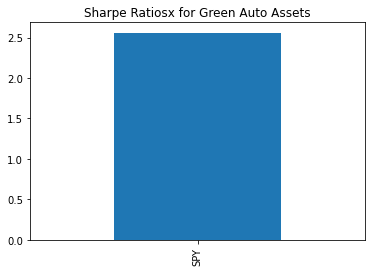

In [32]:
# Plot of Sharpe ratio for spy portfolio
sharpe_ratio_spy.plot.bar(title="Sharpe Ratiosx for Green Auto Assets")

plt.show()

In [33]:
#GENERATE MARKET ANALYSIS REPORT FOR GREEN_AUTO PORTFOLIO

In [34]:
# Create df and calculate pct_change for green_auto portfolio
green_auto_df_closing_prices = pd.DataFrame()

# Fetch the closing prices green_auto portfolio
for stock_ticker in green_auto_tickers:
    green_auto_df_closing_prices[stock_ticker] = green_auto_df[stock_ticker]["close"]

# Drop the time component of the date
green_auto_df_closing_prices.index = green_auto_df_closing_prices.index.date

# Compute daily returns
df_daily_returns_green_auto = green_auto_df_closing_prices.pct_change().dropna()

# Display sample data
df_daily_returns_green_auto.head()

TSLA       SBE      PLUG         F        GM      BLNK  \
2020-11-30 -0.032898 -0.089508  0.003811 -0.000550 -0.026853 -0.098017   
2020-12-01  0.033029 -0.131571 -0.072134  0.016502  0.018928 -0.122494   
2020-12-02 -0.028008  0.002394 -0.015188 -0.004870 -0.002350  0.034763   
2020-12-03  0.043038  0.108837 -0.009506  0.001631 -0.010432 -0.009642   
2020-12-04  0.009641  0.012308  0.041946  0.014658  0.006121  0.051007   

                  QS       ALB  
2020-11-30  0.287170 -0.012707  
2020-12-01 -0.241070 -0.000662  
2020-12-02  0.061443 -0.004563  
2020-12-03  0.010621 -0.026172  
2020-12-04  0.114556  0.056863

In [35]:
df_daily_returns_green_auto.hvplot(
    title="Daily Returns: Green Auto Portfolio",
    xlabel="Date", 
    ylabel="Daily Return", 
    rot=45
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

TSLA

Recent Price Pct: 742.02
Mean Price Pct: 0.004663950864008816
Price Pct std. deviation: 0.036299152336563174
The stock is more volatile than the market.


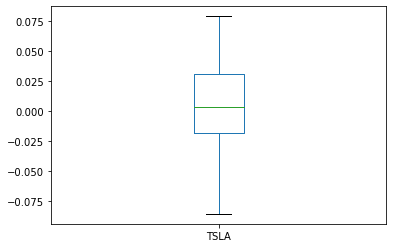



SBE

Recent Price Pct: 34.44
Mean Price Pct: 0.0002703029779936955
Price Pct std. deviation: 0.05501635126816171
The stock is more volatile than the market.


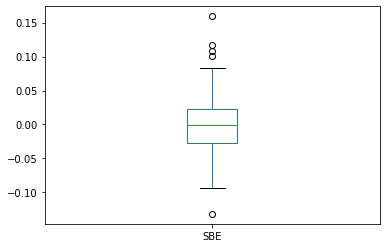



PLUG

Recent Price Pct: 50.2
Mean Price Pct: 0.014089636897820591
Price Pct std. deviation: 0.08158982192776752
The stock is more volatile than the market.


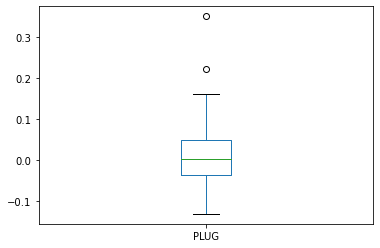



F

Recent Price Pct: 12.265
Mean Price Pct: 0.005352965655115462
Price Pct std. deviation: 0.023727193454429772
The stock is more volatile than the market.


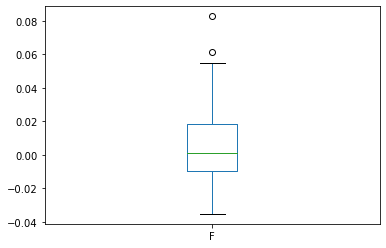



GM

Recent Price Pct: 52.9
Mean Price Pct: 0.0030729639896581954
Price Pct std. deviation: 0.026947171891874098
The stock is more volatile than the market.


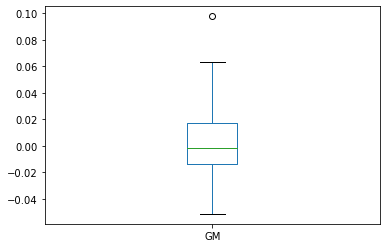



BLNK

Recent Price Pct: 42.56
Mean Price Pct: 0.01124192839168345
Price Pct std. deviation: 0.09429513415010402
The stock is more volatile than the market.


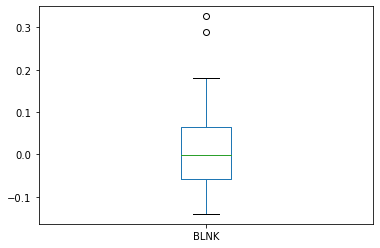



QS

Recent Price Pct: 59.73
Mean Price Pct: 0.01783210487310886
Price Pct std. deviation: 0.1387496214734917
The stock is more volatile than the market.


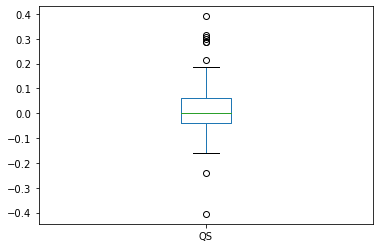



ALB

Recent Price Pct: 160.9
Mean Price Pct: 0.003168084838043159
Price Pct std. deviation: 0.032864111036229125
The stock is more volatile than the market.


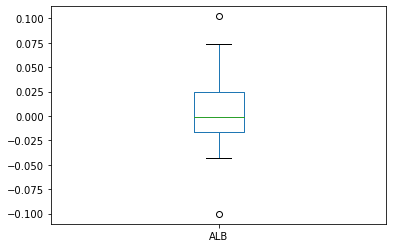

In [36]:
# Loop through the stocks in the green_auto portfolio and compare their performance
# with the sp500.
for stock_ticker in df_daily_returns_green_auto:

    # Get most recent price
    stock_recent_price = green_auto_df[stock_ticker]["close"][-1]

    # Calculate the mean price percent change
    stock_mean = calculate_mean(df_daily_returns_green_auto[stock_ticker])
    
    # Calculate the standard deviation of the percent change
    stock_std = calculate_standard_deviation(df_daily_returns_green_auto[stock_ticker])
    
    # Print the stock name and calculated statistics
    print(f"{stock_ticker}\n")
    print(f"Recent Price Pct: {stock_recent_price}")
    print(f"Mean Price Pct: {stock_mean}")
    print(f"Price Pct std. deviation: {stock_std}")
    
    # Compare the stock's volatility with the underlying market
    compare_volatility(stock_std, spy_std)
    
    # Display daily returns box plot
    df_daily_returns_green_auto[stock_ticker].plot.box()
    plt.show()
    print("\n")

In [37]:
# Average annual return for green_auto portolio
average_annual_return(df_daily_returns_green_auto)

TSLA    1.175316
SBE     0.068116
PLUG    3.550588
F       1.348947
GM      0.774387
BLNK    2.832966
QS      4.493690
ALB     0.798357
dtype: float64

In [38]:
# Annualized standard deviation for green_auto portfolio
annualized_standard_deviation(df_daily_returns_green_auto)

TSLA    0.576231
SBE     0.873358
PLUG    1.295198
F       0.376658
GM      0.427773
BLNK    1.496889
QS      2.202582
ALB     0.521702
dtype: float64

In [39]:
# Sharpe ratios for green_auto portfolio
sharpe_ratio_green_auto = sharpe_ratio(df_daily_returns_green_auto)
sharpe_ratio(df_daily_returns_green_auto)

TSLA    2.039660
SBE     0.077994
PLUG    2.741347
F       3.581363
GM      1.810275
BLNK    1.892569
QS      2.040192
ALB     1.530295
dtype: float64

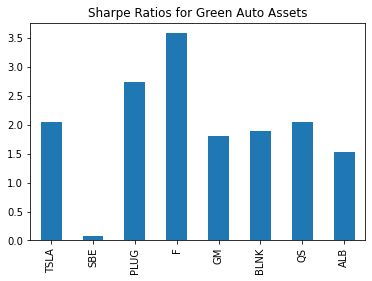

In [40]:
# Plot of Sharpe ratios for green_auto portfolio
sharpe_ratio_green_auto.plot.bar(title="Sharpe Ratios for Green Auto Assets")

plt.show()

In [41]:
#GENERATE MARKET ANALYSIS REPORT FOR GREEN_BUILDING PORTFOLIO

In [42]:
# Create df and calculate pct_change for green_building
green_building_df_closing_prices = pd.DataFrame()

# Fetch the closing prices green_building portfolio
for stock_ticker in green_building_tickers:
    green_building_df_closing_prices[stock_ticker] = green_building_df[stock_ticker]["close"]

# Drop the time component of the date
green_building_df_closing_prices.index = green_building_df_closing_prices.index.date

# Compute daily returns
df_daily_returns_green_building = green_building_df_closing_prices.pct_change().dropna()

 # Display daily returns
df_daily_returns_green_building.head()

TT       AVB       ROK       AYI
2020-10-02  0.015829  0.015874  0.017584  0.028635
2020-10-05  0.024867  0.015499  0.043603  0.041568
2020-10-06 -0.002600 -0.012335 -0.001416 -0.002727
2020-10-07  0.010110 -0.010660  0.015593  0.032726
2020-10-08  0.014700  0.020720  0.019922 -0.104069

In [43]:
df_daily_returns_green_building.hvplot(
    title="Daily Returns: Green Building Portfolio",
    xlabel="Date", 
    ylabel="Daily Return", 
    rot=45
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

TT

Recent Price Pct: 155.32
Mean Price Pct: 0.0025900689739276023
Price Pct std. deviation: 0.016933356008979664
The stock is more volatile than the market.


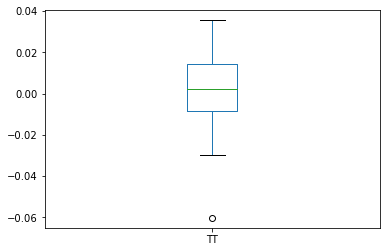



AVB

Recent Price Pct: 185.05
Mean Price Pct: 0.0019523254631458522
Price Pct std. deviation: 0.020308025552913812
The stock is more volatile than the market.


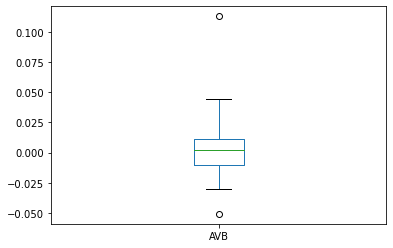



ROK

Recent Price Pct: 247.16
Mean Price Pct: 0.00135623527438156
Price Pct std. deviation: 0.017812338904193002
The stock is more volatile than the market.


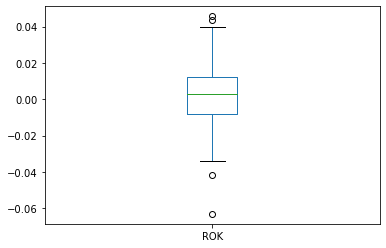



AYI

Recent Price Pct: 127.7
Mean Price Pct: 0.002584652331868338
Price Pct std. deviation: 0.02762662623332793
The stock is more volatile than the market.


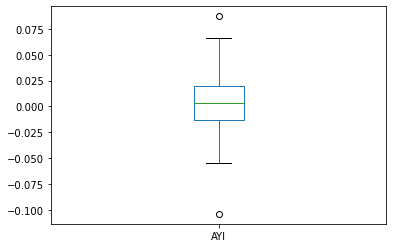

In [44]:
# Loop through the stocks in the green_building portfolio and compare their performance
# with the sp500.
for stock_ticker in df_daily_returns_green_building:

    # Get most recent price
    stock_recent_price = green_building_df[stock_ticker]["close"][-1]

    # Calculate the mean price percent change
    stock_mean = calculate_mean(df_daily_returns_green_building[stock_ticker])
    
    # Calculate the standard deviation of the percent change
    stock_std = calculate_standard_deviation(df_daily_returns_green_building[stock_ticker])
    
    # Print the stock name and calculated statistics
    print(f"{stock_ticker}\n")
    print(f"Recent Price Pct: {stock_recent_price}")
    print(f"Mean Price Pct: {stock_mean}")
    print(f"Price Pct std. deviation: {stock_std}")
    
    # Compare the stock's volatility with the underlying market
    compare_volatility(stock_std, spy_std)

    # Display daily returns box plot
    df_daily_returns_green_building[stock_ticker].plot.box()
    plt.show()
    print("\n")

In [45]:
# Average annual return for green_building portolio
average_annual_return(df_daily_returns_green_building)

TT     0.652697
AVB    0.491986
ROK    0.341771
AYI    0.651332
dtype: float64

In [46]:
# Annualized standard deviation for green_building portfolio
annualized_standard_deviation(df_daily_returns_green_building)

TT     0.268809
AVB    0.322380
ROK    0.282762
AYI    0.438559
dtype: float64

In [47]:
# Sharpe ratios for green_building portfolio
sharpe_ratio_green_building = sharpe_ratio(df_daily_returns_green_building)
sharpe_ratio(df_daily_returns_green_building)

TT     2.428111
AVB    1.526106
ROK    1.208688
AYI    1.485164
dtype: float64

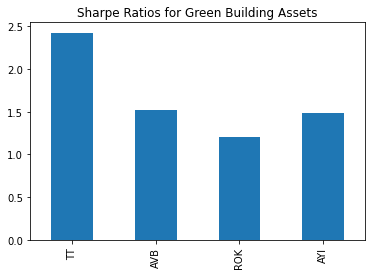

In [48]:
# Plot of Sharpe ratios for green_building portfolio
sharpe_ratio_green_building.plot.bar(title="Sharpe Ratios for Green Building Assets")

plt.show()

In [49]:
#GENERATE MARKET ANALYSIS REPORT FOR GREEN_ENERGY PORTFOLIO

In [50]:
# Create df and calculate pct_change for green_energy
green_energy_df_closing_prices = pd.DataFrame()

# Fetch the closing prices green_energy portfolio
for stock_ticker in green_energy_tickers:
    green_energy_df_closing_prices[stock_ticker] = green_energy_df[stock_ticker]["close"]

# Drop the time component of the date
green_energy_df_closing_prices.index = green_energy_df_closing_prices.index.date

# Compute daily returns
df_daily_returns_green_energy = green_energy_df_closing_prices.pct_change().dropna()

# Display daily returns
df_daily_returns_green_energy.head()

REGI       LNG       RUN        DQ      TPIC       NEE  \
2020-10-02  0.032826  0.013351 -0.043995 -0.002481 -0.016515 -0.006415   
2020-10-05  0.025319  0.011262  0.028108  0.129108  0.065456  0.024279   
2020-10-06 -0.012084 -0.021433 -0.000890  0.026963  0.008363  0.007398   
2020-10-07  0.058678 -0.004724 -0.008018  0.094188  0.118341  0.023616   
2020-10-08  0.008205  0.042503 -0.094817 -0.013667 -0.028808  0.014381   

                 AGR       ETN       ORA  
2020-10-02  0.022261  0.020877  0.013534  
2020-10-05  0.023687  0.023371  0.022255  
2020-10-06  0.004292 -0.006280  0.034349  
2020-10-07  0.016165  0.023556  0.072342  
2020-10-08  0.017188  0.005520  0.025443

In [51]:
df_daily_returns_green_energy.hvplot(
    title="Daily Returns: Green Energy Portfolio",
    xlabel="Date", 
    ylabel="Daily Return", 
    rot=45
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

REGI

Recent Price Pct: 94.03
Mean Price Pct: 0.006715819282452945
Price Pct std. deviation: 0.04714597395431501
The stock is more volatile than the market.


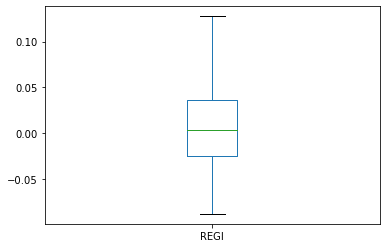



LNG

Recent Price Pct: 70.05
Mean Price Pct: 0.004381274105206991
Price Pct std. deviation: 0.021143103148256934
The stock is more volatile than the market.


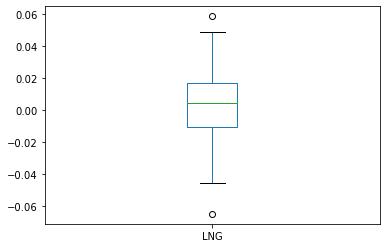



RUN

Recent Price Pct: 62.53
Mean Price Pct: -0.0014764887233845636
Price Pct std. deviation: 0.045215792844430815
The stock is more volatile than the market.


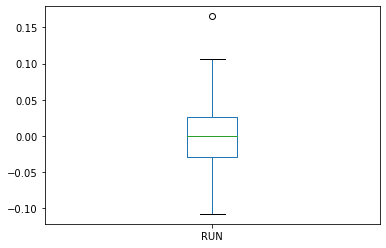



DQ

Recent Price Pct: 105.53
Mean Price Pct: 0.007089588980399057
Price Pct std. deviation: 0.10712007526120629
The stock is more volatile than the market.


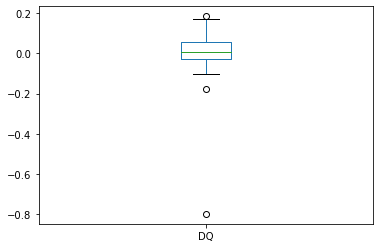



TPIC

Recent Price Pct: 65.49
Mean Price Pct: 0.009020666708509288
Price Pct std. deviation: 0.04495307567680098
The stock is more volatile than the market.


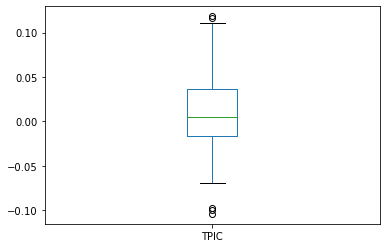



NEE

Recent Price Pct: 73.79
Mean Price Pct: -0.007031019563052363
Price Pct std. deviation: 0.07711167907369708
The stock is more volatile than the market.


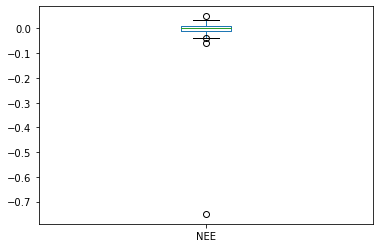



AGR

Recent Price Pct: 45.64
Mean Price Pct: -0.0010462896688419807
Price Pct std. deviation: 0.015262753075378308
The stock is more volatile than the market.


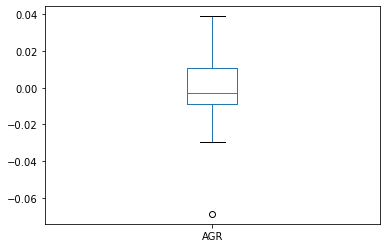



ETN

Recent Price Pct: 132.68
Mean Price Pct: 0.0029459668872784464
Price Pct std. deviation: 0.017146878116110487
The stock is more volatile than the market.


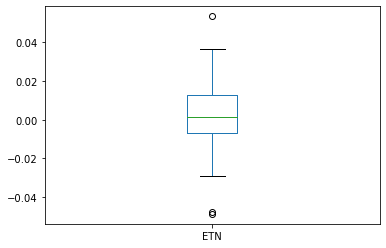



ORA

Recent Price Pct: 103.23
Mean Price Pct: 0.006037062979865722
Price Pct std. deviation: 0.03232078177535162
The stock is more volatile than the market.


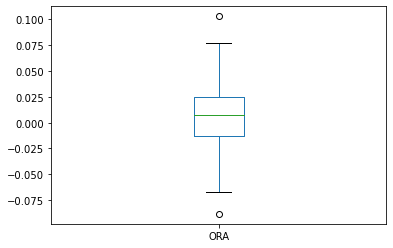

In [52]:
# Loop through the stocks in the green_energy portfolio and compare their performance
# with the sp500.
for stock_ticker in df_daily_returns_green_energy:

    # Get most recent price
    stock_recent_price = green_energy_df[stock_ticker]["close"][-1]

    # Calculate the mean price percent change
    stock_mean = calculate_mean(df_daily_returns_green_energy[stock_ticker])
    
    # Calculate the standard deviation of the percent change
    stock_std = calculate_standard_deviation(df_daily_returns_green_energy[stock_ticker])
    
    # Print the stock name and calculated statistics
    print(f"{stock_ticker}\n")
    print(f"Recent Price Pct: {stock_recent_price}")
    print(f"Mean Price Pct: {stock_mean}")
    print(f"Price Pct std. deviation: {stock_std}")
    
    # Compare the stock's volatility with the underlying market
    compare_volatility(stock_std, spy_std)

    # Display daily returns box plot
    df_daily_returns_green_energy[stock_ticker].plot.box()
    plt.show()
    print("\n")

In [53]:
# Average annual return for green_energy portolio
average_annual_return(df_daily_returns_green_energy)

REGI    1.692386
LNG     1.104081
RUN    -0.372075
DQ      1.786576
TPIC    2.273208
NEE    -1.771817
AGR    -0.263665
ETN     0.742384
ORA     1.521340
dtype: float64

In [54]:
# Annualized standard deviation for green_energy portfolio
annualized_standard_deviation(df_daily_returns_green_energy)

REGI    0.748419
LNG     0.335636
RUN     0.717778
DQ      1.700478
TPIC    0.713608
NEE     1.224110
AGR     0.242289
ETN     0.272198
ORA     0.513077
dtype: float64

In [55]:
# Sharpe ratios for green_energy portfolio
sharpe_ratio_green_energy = sharpe_ratio(df_daily_returns_green_energy)
sharpe_ratio(df_daily_returns_green_energy)

REGI    2.261282
LNG     3.289516
RUN    -0.518370
DQ      1.050632
TPIC    3.185514
NEE    -1.447433
AGR    -1.088227
ETN     2.727364
ORA     2.965133
dtype: float64

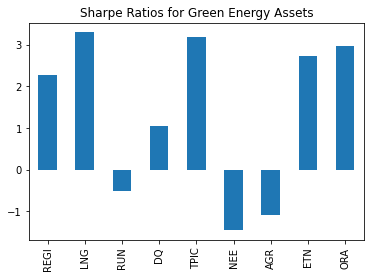

In [56]:
# Plot of Sharpe ratios for green_energy portfolio
sharpe_ratio_green_energy.plot.bar(title="Sharpe Ratios for Green Energy Assets")

plt.show()

In [57]:
#GENERATE MARKET ANALYSIS REPORT FOR GREEN_AGRICULTURE PORTFOLIO

In [58]:
# Create df and calculate pct_change for green_agriculture
green_agriculture_df_closing_prices = pd.DataFrame()

# Generate closing prices green_agriculture portfolio
for stock_ticker in green_agriculture_tickers:
    green_agriculture_df_closing_prices[stock_ticker] = green_agriculture_df[stock_ticker]["close"]

# Drop the time component of the date
green_agriculture_df_closing_prices.index = green_agriculture_df_closing_prices.index.date

# Compute daily returns
df_daily_returns_green_agriculture = green_agriculture_df_closing_prices.pct_change().dropna()

# Display daily returns
df_daily_returns_green_agriculture.head()

TRMB         A      CWCO       XYL
2020-10-02  0.009003 -0.011954  0.015489  0.021985
2020-10-05  0.028595  0.030797  0.048618  0.023350
2020-10-06 -0.036278 -0.014356 -0.016364  0.001969
2020-10-07  0.033142  0.022340  0.022181  0.019535
2020-10-08  0.012079  0.002695  0.000000  0.018594

In [59]:
df_daily_returns_green_agriculture.hvplot(
    title="Daily Returns: Green Agriculture Portfolio",
    xlabel="Date", 
    ylabel="Daily Return", 
    rot=45
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

TRMB

Recent Price Pct: 76.04
Mean Price Pct: 0.004669996211921469
Price Pct std. deviation: 0.019855549285322394
The stock is more volatile than the market.


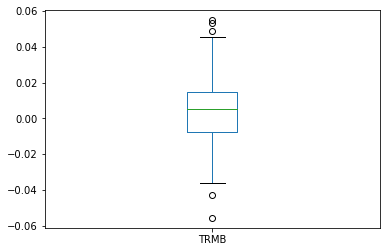



A

Recent Price Pct: 125.01
Mean Price Pct: 0.0022396951758872313
Price Pct std. deviation: 0.014559822900768146
The stock is more volatile than the market.


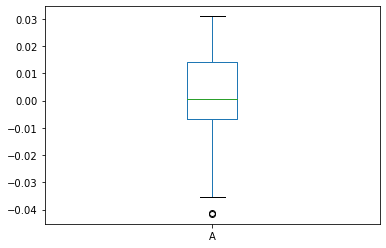



CWCO

Recent Price Pct: 13.27
Mean Price Pct: 0.002749038734223851
Price Pct std. deviation: 0.0209541346052498
The stock is more volatile than the market.


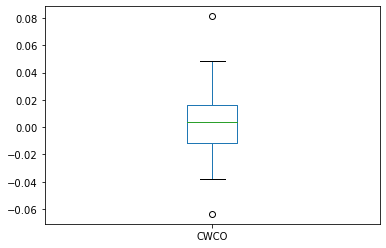



XYL

Recent Price Pct: 101.09
Mean Price Pct: 0.002181236657977104
Price Pct std. deviation: 0.016440615681666992
The stock is more volatile than the market.


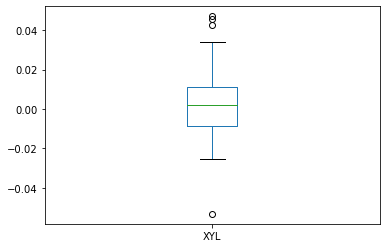

In [60]:
# Loop through the stocks in the green_agriculture portfolio and compare their performance
# with the sp500.
for stock_ticker in df_daily_returns_green_agriculture:

    # Get most recent price
    stock_recent_price = green_agriculture_df[stock_ticker]["close"][-1]

    # Calculate the mean price percent change
    stock_mean = calculate_mean(df_daily_returns_green_agriculture[stock_ticker])
    
    # Calculate the standard deviation of the percent change
    stock_std = calculate_standard_deviation(df_daily_returns_green_agriculture[stock_ticker])
    
    # Print the stock name and calculated statistics
    print(f"{stock_ticker}\n")
    print(f"Recent Price Pct: {stock_recent_price}")
    print(f"Mean Price Pct: {stock_mean}")
    print(f"Price Pct std. deviation: {stock_std}")
    
    # Compare the stock's volatility with the underlying market
    compare_volatility(stock_std, spy_std)

    # Display daily returns box plot
    df_daily_returns_green_agriculture[stock_ticker].plot.box()
    plt.show()
    print("\n")

In [61]:
# Average annual return for green_agriculture portolio
average_annual_return(df_daily_returns_green_agriculture)

TRMB    1.176839
A       0.564403
CWCO    0.692758
XYL     0.549672
dtype: float64

In [62]:
# Annualized standard deviation for green_agriculture portfolio
annualized_standard_deviation(df_daily_returns_green_agriculture)

TRMB    0.315197
A       0.231130
CWCO    0.332637
XYL     0.260987
dtype: float64

In [63]:
# Sharpe ratios for green_agriculture portfolio
sharpe_ratio_green_agriculture = sharpe_ratio(df_daily_returns_green_agriculture)
sharpe_ratio(df_daily_returns_green_agriculture)

TRMB    3.733661
A       2.441929
CWCO    2.082627
XYL     2.106129
dtype: float64

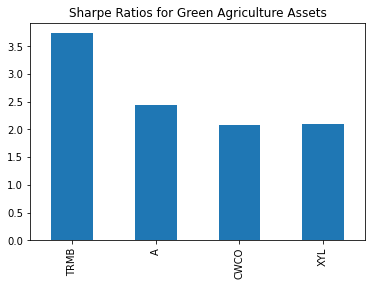

In [64]:
# Plot of Sharpe ratios for green_agriculture portfolio
sharpe_ratio_green_agriculture.plot.bar(title="Sharpe Ratios for Green Agriculture Assets")

plt.show()

In [65]:
#MONTE CARLO SIMULATIONS: GREEN AUTO ASSETS

In [66]:
# Set parameters of simulations
num_sims = 500
num_years = 1
green_auto_weights = [.125, .125, .125, .125, .125, .125, .125, .125]
initial_investment = 1000

In [67]:
# Configure Monte Carlo simulation for green_auto portolio
MC_green_auto = MCSimulation(
    portfolio_data = green_auto_df,
    weights= green_auto_weights,
    num_simulation = num_sims,
    num_trading_days = 252 * num_years
)

In [68]:
# Run Monte Carlo simulations to forecast one year daily returns
MC_green_auto.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0          1          2         3          4          5    \
0     1.000000   1.000000   1.000000  1.000000   1.000000   1.000000   
1     1.021126   0.994056   1.050113  0.991239   0.977533   0.978864   
2     1.005115   1.008115   1.094840  1.049033   0.979538   0.980345   
3     1.016136   1.016921   1.127438  1.050530   1.004577   0.997731   
4     1.044134   1.038623   1.152147  1.075229   1.013689   1.002873   
..         ...        ...        ...       ...        ...        ...   
248  25.247554  16.763462  10.321670  7.315401  23.747764  15.735901   
249  24.753998  16.686191  10.611666  7.454725  23.280772  15.279606   
250  25.100392  17.415647  10.634227  7.153162  23.278047  16.047045   
251  24.900085  18.216802  10.656297  7.208134  22.953705  16.433687   
252  24.641940  17.778718  10.510154  7.083391  22.376638  16.195831   

          6          7         8          9    ...        490        491  \
0    1.000000   1.000000  1.000000   1.000000  ...   1.000000   1.000000   
1    1.000485   1.037910  0.985206   1.024461  ...   1.011415   1.006538   
2    1.012465   1.026400  0.980341   1.010189  ...   0.996205   1.012741   
3    1.051177   1.052418  0.983805   1.042261  ...   1.031652   1.053549   
4    1.060162   1.020720  0.993620   1.031814  ...   1.051653   1.006472   
..        ...        ...       ...        ...  ...        ...        ...   
248  9.546888  11.372537  7.585569  11.144416  ...  15.013560  19.695784   
249  9.373950  11.030966  7.481248  11.170391  ...  15.561306  19.479708   
250  9.218192  10.868558  7.508079  11.305272  ...  15.521983  19.981664   
251  9.882152  11.088757  7.626784  11.775276  ...  15.596005  20.028819   
252  9.862729  11.537792  7.522663  12.147735  ...  15.141206  19.846167   

           492        493        494       495        496       497  \
0     1.000000   1.000000   1.000000  1.000000   1.000000  1.000000   
1     1.001820   1.045463   0.971208  1.032675   1.034563  1.030484   
2     1.019001   1.086156   0.924718  0.998670   1.075417  0.983861   
3     1.071911   1.046717   0.925277  1.034740   1.067372  1.000467   
4     1.069811   1.074749   0.896058  1.009567   1.120016  1.005942   
..         ...        ...        ...       ...        ...       ...   
248  11.755926  12.251695  14.426435  8.684526  16.784082  8.503894   
249  11.903516  12.450582  14.473901  8.697765  17.106572  8.413626   
250  11.511121  12.142300  14.578567  8.733261  17.508268  8.605720   
251  11.508855  11.934362  14.753207  8.828215  17.439403  8.830185   
252  11.702625  11.761507  14.896498  8.789231  17.886012  8.881936   

           498        499  
0     1.000000   1.000000  
1     0.972944   1.058119  
2     0.980252   1.043056  
3     1.039363   1.047553  
4     1.036806   1.057991  
..         ...        ...  
248  11.988762  17.764335  
249  11.830807  17.975604  
250  12.055858  18.364300  
251  12.114614  18.266299  
252  12.111738  18.785368  

[253 rows x 500 columns]

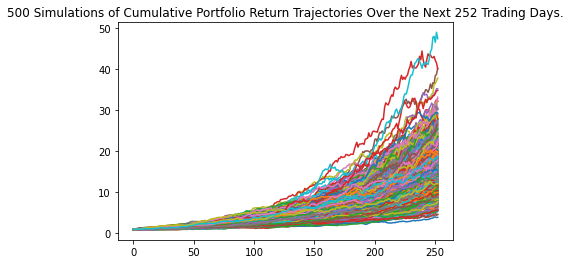

In [69]:
MC_auto_building_simulation_plot = MC_green_auto.plot_simulation()
MC_auto_building_simulation_plot.get_figure().savefig("MC_green_auto_one_year_simulation_plot.png", bbox_inches="tight")

In [70]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_green_auto.simulated_return.mean(axis=1)),
    "median": list(MC_green_auto.simulated_return.median(axis=1)),
    "min": list(MC_green_auto.simulated_return.min(axis=1)),
    "max": list(MC_green_auto.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

mean    median       min       max
0  1.000000  1.000000  1.000000  1.000000
1  1.010855  1.010640  0.928318  1.081461
2  1.022122  1.020232  0.922678  1.154664
3  1.035570  1.034749  0.911889  1.201859
4  1.045684  1.043532  0.896058  1.238486

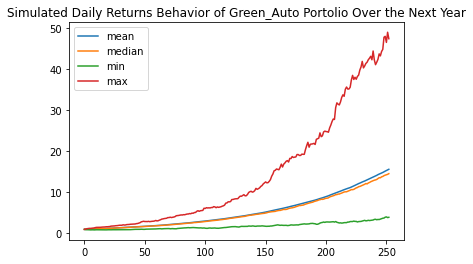

In [71]:
# Visually analyze the trajectory of green_auto portfolio daily returns on the next year of trading days simulation
simulated_returns_plot = df_simulated_returns.plot(title="Simulated Daily Returns Behavior of Green_Auto Portolio Over the Next Year")
simulated_returns_plot.get_figure().savefig("MC_green_auto_one_year.png", bbox_inches="tight")

In [72]:
# Progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl.head()

mean       median          min          max
0  1000.000000  1000.000000  1000.000000  1000.000000
1  1010.855011  1010.640269   928.317731  1081.461442
2  1022.121566  1020.231986   922.678132  1154.664264
3  1035.569556  1034.749370   911.888987  1201.858632
4  1045.683619  1043.531882   896.058415  1238.486243

In [73]:
# Summary statistics from the Monte Carlo simulation results
summary_statistics_green_auto = MC_green_auto.summarize_cumulative_return()

print(summary_statistics_green_auto)

count           500.000000
mean             15.634517
std               6.329173
min               3.939762
25%              11.327963
50%              14.569819
75%              19.184385
max              47.460289
95% CI Lower      6.405182
95% CI Upper     30.332722
Name: 252, dtype: float64


In [74]:
# Calculate the range of the possible outcomes within 95% CI of investments in green_auto portfolio
ci_lower = summary_statistics_green_auto[8]*initial_investment
ci_upper = summary_statistics_green_auto[9]*initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of $1,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}.")

There is a 95% chance that an initial investment of $1,000 in the portfolio over the next year will end within in the range of $6,405.18 and $30,332.72.


In [75]:
#MONTE CARLO SIMULATIONS: GREEN BUILDING ASSETS

In [76]:
# Set parameters of simulations
num_sims = 500
num_years = 1
green_building_weights = [.25, .25, .25, .25]
initial_investment = 1000

In [77]:
# Configure Monte Carlo simulation for green_building portolio
MC_green_building = MCSimulation(
    portfolio_data = green_building_df,
    weights= green_building_weights,
    num_simulation = num_sims,
    num_trading_days = 252 * num_years
)

In [78]:
# Run Monte Carlo simulations to forecast one year daily returns
MC_green_building.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    0.990494  1.002243  1.011339  0.999768  0.978668  0.991874  1.006229   
2    0.992092  1.027456  1.007858  1.002222  0.987441  0.978532  1.007122   
3    1.000477  1.011000  1.018302  1.005616  0.982303  0.976868  1.004002   
4    0.995326  1.004380  1.033204  1.014477  0.986529  0.989847  0.984273   
..        ...       ...       ...       ...       ...       ...       ...   
248  1.754513  1.619137  1.805271  1.622390  2.083718  1.657054  1.501485   
249  1.774870  1.646806  1.808392  1.624587  2.075416  1.652740  1.468189   
250  1.768142  1.659636  1.801444  1.660289  2.073445  1.649111  1.467232   
251  1.752108  1.637767  1.794061  1.663347  2.095448  1.664454  1.488957   
252  1.752693  1.652280  1.806731  1.696817  2.102924  1.655540  1.488404   

          7         8         9    ...       490       491       492  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1    0.997782  1.002942  1.006162  ...  1.014946  1.006237  1.015435   
2    0.979838  1.024810  1.017943  ...  1.026597  1.022989  1.034990   
3    1.004419  1.030917  1.015542  ...  1.021799  1.010043  1.030195   
4    1.020057  1.026379  0.996297  ...  1.018898  1.001151  1.023987   
..        ...       ...       ...  ...       ...       ...       ...   
248  1.939638  2.025392  2.280092  ...  1.625551  1.683000  1.318339   
249  1.914860  2.000017  2.250690  ...  1.604428  1.677522  1.314121   
250  1.942577  2.006612  2.254523  ...  1.568172  1.706664  1.330787   
251  1.957992  2.018889  2.241675  ...  1.564460  1.710335  1.338058   
252  1.979890  2.027285  2.214612  ...  1.599920  1.699407  1.347214   

          493       494       495       496       497       498       499  
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1    1.008708  1.010517  1.012931  0.995846  0.998366  0.991398  0.981353  
2    1.018918  1.014167  1.018844  1.001498  0.996280  0.992993  1.006216  
3    1.029702  1.028274  1.025679  0.996996  0.984573  0.984934  1.008941  
4    1.036037  1.024108  1.023821  0.998176  0.990138  0.966365  1.005456  
..        ...       ...       ...       ...       ...       ...       ...  
248  1.293586  2.307987  1.690974  1.621476  1.821993  1.572097  1.539276  
249  1.300935  2.287411  1.729051  1.639554  1.800329  1.559956  1.562523  
250  1.294401  2.257497  1.725338  1.663316  1.841517  1.532640  1.549966  
251  1.278427  2.253337  1.748316  1.677003  1.825530  1.536058  1.537735  
252  1.312621  2.291870  1.761853  1.692515  1.849981  1.545782  1.569861  

[253 rows x 500 columns]

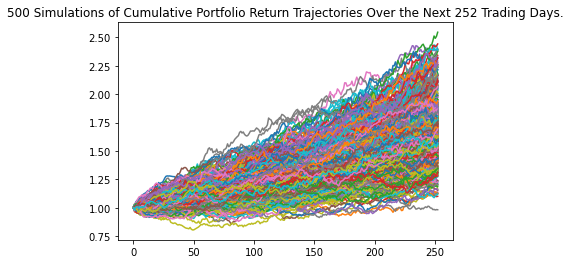

In [79]:
MC_green_building_simulation_plot = MC_green_building.plot_simulation()
MC_green_building_simulation_plot.get_figure().savefig("MC_green_building_one_year_simulation_plot.png", bbox_inches="tight")

In [80]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_green_building.simulated_return.mean(axis=1)),
    "median": list(MC_green_building.simulated_return.median(axis=1)),
    "min": list(MC_green_building.simulated_return.min(axis=1)),
    "max": list(MC_green_building.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

mean    median       min       max
0  1.000000  1.000000  1.000000  1.000000
1  1.001482  1.001525  0.966453  1.035008
2  1.003701  1.002786  0.961704  1.051442
3  1.005254  1.005345  0.953942  1.067168
4  1.007253  1.005809  0.952087  1.084519

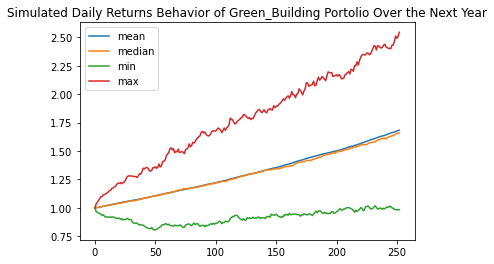

In [81]:
# Visually analyze the trajectory of green_building portfolio daily returns on the next year of trading days simulation
simulated_returns_plot = df_simulated_returns.plot(title="Simulated Daily Returns Behavior of Green_Building Portolio Over the Next Year")
simulated_returns_plot.get_figure().savefig("MC_green_building_one_year.png", bbox_inches="tight")

In [82]:
# Progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl.head()

mean       median          min          max
0  1000.000000  1000.000000  1000.000000  1000.000000
1  1001.482171  1001.524532   966.453207  1035.008337
2  1003.700888  1002.785939   961.703595  1051.441704
3  1005.254158  1005.344877   953.942279  1067.167695
4  1007.252912  1005.808775   952.086540  1084.519363

In [83]:
# Summary statistics from the Monte Carlo simulation results
summary_statistics_green_building = MC_green_building.summarize_cumulative_return()

print(summary_statistics_green_building)

count           500.000000
mean              1.683396
std               0.276930
min               0.983838
25%               1.496159
50%               1.658504
75%               1.850113
max               2.545020
95% CI Lower      1.202262
95% CI Upper      2.303841
Name: 252, dtype: float64


In [84]:
# Calculate the range of the possible outcomes within 95% CI of investments in green_building portfolio
ci_lower = summary_statistics_green_building[8]*initial_investment
ci_upper = summary_statistics_green_building[9]*initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of $1,000 in the green_building portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}.")

There is a 95% chance that an initial investment of $1,000 in the green_building portfolio over the next year will end within in the range of $1,202.26 and $2,303.84.


In [85]:
#MONTE CARLO SIMULATIONS: GREEN ENERGY ASSETS

In [86]:
# Set parameters of simulations
num_sims = 500
num_years = 1
green_energy_weights = [.11, .11, .11, .11, .11, .11, .11, .11, .11]
initial_investment = 1000

In [87]:
# Configure Monte Carlo simulation for green_energy portolio
MC_green_energy = MCSimulation(
    portfolio_data = green_energy_df,
    weights= green_energy_weights,
    num_simulation = num_sims,
    num_trading_days = 252 * num_years
)

In [88]:
# Run Monte Carlo simulations to forecast one year daily returns
MC_green_energy.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    1.003757  0.997530  0.993085  1.003132  1.012024  0.977596  0.998536   
2    1.024529  1.020224  1.003521  1.006633  1.017621  0.983870  1.004083   
3    1.002246  1.024055  1.005222  0.997237  1.021901  0.988611  1.012067   
4    1.010799  1.035712  1.012535  1.016236  1.013913  0.980745  1.026595   
..        ...       ...       ...       ...       ...       ...       ...   
248  2.600623  2.252798  1.468258  2.140987  2.397455  1.259619  1.936669   
249  2.560654  2.259051  1.435154  2.125704  2.342405  1.269265  1.926428   
250  2.629177  2.234844  1.437038  2.199931  2.351043  1.260526  1.942373   
251  2.693607  2.188636  1.449635  2.131452  2.306342  1.233501  1.923927   
252  2.641128  2.230781  1.485751  2.078010  2.260464  1.236958  1.953754   

          7         8         9    ...       490       491       492  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1    0.998261  1.020640  0.971525  ...  1.016538  1.001070  1.019497   
2    0.992383  1.021791  0.974283  ...  1.009204  1.022282  1.019760   
3    0.975298  1.032904  0.968746  ...  1.026242  1.015940  1.046576   
4    1.005119  1.037303  0.984763  ...  1.018509  0.988124  1.056846   
..        ...       ...       ...  ...       ...       ...       ...   
248  2.297469  1.644673  1.526986  ...  2.685502  2.513826  1.894648   
249  2.304529  1.643779  1.535683  ...  2.709056  2.521752  1.951031   
250  2.277185  1.650581  1.567697  ...  2.684859  2.591094  1.974812   
251  2.331012  1.722836  1.625734  ...  2.671641  2.590784  1.955874   
252  2.315062  1.759282  1.634885  ...  2.716301  2.636846  1.985276   

          493       494       495       496       497       498       499  
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1    1.009650  0.988533  0.987411  1.010355  0.988329  0.998596  0.993957  
2    1.051681  1.023282  0.984134  0.981140  0.980071  0.994786  1.002755  
3    1.066589  0.994232  0.971146  1.016910  0.951393  0.994951  1.037783  
4    1.091403  0.965795  0.965216  1.033418  0.942040  0.993259  1.040879  
..        ...       ...       ...       ...       ...       ...       ...  
248  1.573397  1.647521  1.621504  2.661764  2.155376  1.959025  2.319521  
249  1.560573  1.660874  1.642683  2.652958  2.143672  1.929955  2.306522  
250  1.526176  1.695569  1.577831  2.613716  2.196252  1.897506  2.304188  
251  1.496578  1.709756  1.558320  2.583964  2.206132  1.940422  2.355201  
252  1.459640  1.748791  1.590387  2.536042  2.193764  1.956889  2.309960  

[253 rows x 500 columns]

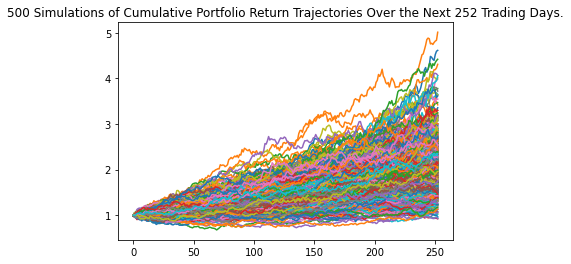

In [89]:
MC_green_energy_simulation_plot = MC_green_energy.plot_simulation()
MC_green_energy_simulation_plot.get_figure().savefig("MC_green_energy_one_year_simulation_plot.png", bbox_inches="tight")

In [90]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_green_energy.simulated_return.mean(axis=1)),
    "median": list(MC_green_energy.simulated_return.median(axis=1)),
    "min": list(MC_green_energy.simulated_return.min(axis=1)),
    "max": list(MC_green_energy.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

mean    median       min       max
0  1.000000  1.000000  1.000000  1.000000
1  1.002236  1.002706  0.956650  1.048141
2  1.005198  1.003487  0.933998  1.077284
3  1.008337  1.007290  0.903744  1.124455
4  1.011539  1.012031  0.917470  1.145322

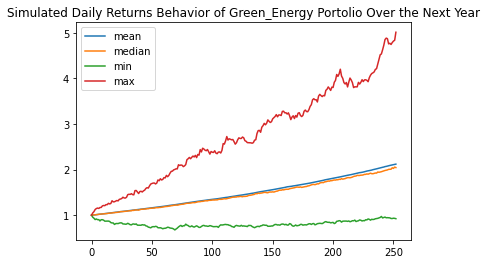

In [91]:
# Visually analyze the trajectory of green_energy portfolio daily returns on the next year of trading days simulation
simulated_returns_plot = df_simulated_returns.plot(title="Simulated Daily Returns Behavior of Green_Energy Portolio Over the Next Year")
simulated_returns_plot.get_figure().savefig("MC_green_energy_one_year.png", bbox_inches="tight")

In [92]:
# Progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl.head()

mean       median          min          max
0  1000.000000  1000.000000  1000.000000  1000.000000
1  1002.235540  1002.706194   956.650410  1048.140657
2  1005.198333  1003.486708   933.998099  1077.284252
3  1008.337239  1007.290079   903.744309  1124.454910
4  1011.538985  1012.031305   917.470344  1145.321714

In [93]:
# Summary statistics from the Monte Carlo simulation results
summary_statistics_green_energy = MC_green_energy.summarize_cumulative_return()

print(summary_statistics_green_energy)

count           500.000000
mean              2.119364
std               0.618517
min               0.923290
25%               1.666717
50%               2.043990
75%               2.470694
max               5.011334
95% CI Lower      1.161760
95% CI Upper      3.621220
Name: 252, dtype: float64


In [94]:
# Calculate the range of the possible outcomes within 95% CI of investments in green_energy portfolio
ci_lower = summary_statistics_green_energy[8]*initial_investment
ci_upper = summary_statistics_green_energy[9]*initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of $1,000 in the green_energy portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}.")

There is a 95% chance that an initial investment of $1,000 in the green_energy portfolio over the next year will end within in the range of $1,161.76 and $3,621.22.


In [95]:
#MONTE CARLO SIMULATIONS: GREEN AGRICULTURAL ASSETS

In [96]:
# Set parameters of simulations
num_sims = 500
num_years = 1
green_agriculture_weights = [.25, .25, .25, .25]
initial_investment = 1000

In [97]:
# Configure Monte Carlo simulation for green_agriculture portolio
MC_green_agriculture = MCSimulation(
    portfolio_data = green_agriculture_df,
    weights= green_agriculture_weights,
    num_simulation = num_sims,
    num_trading_days = 252 * num_years
)

In [98]:
# Run Monte Carlo simulations to forecast one year daily returns
MC_green_agriculture.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    0.989727  1.010001  1.007501  1.006063  0.996253  1.003195  1.007198   
2    0.991299  1.011997  1.011987  0.991960  0.984588  1.004923  1.010196   
3    1.004092  1.017026  1.019395  1.007005  0.982121  1.008958  1.018324   
4    1.004652  1.014693  1.028986  1.003052  0.968937  1.016588  1.013166   
..        ...       ...       ...       ...       ...       ...       ...   
248  1.853487  2.652005  2.416160  2.887550  1.288352  2.637844  1.998640   
249  1.868918  2.626431  2.416818  2.870831  1.306644  2.623063  2.030531   
250  1.885884  2.631197  2.388650  2.859579  1.326721  2.667286  2.017799   
251  1.894883  2.680850  2.386654  2.811255  1.332900  2.703691  2.033996   
252  1.900466  2.678531  2.414363  2.805864  1.323696  2.697603  2.072758   

          7         8         9    ...       490       491       492  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1    1.008714  1.009122  1.000049  ...  1.019274  1.012597  0.998467   
2    1.018123  1.005771  1.004014  ...  1.019752  1.028643  1.009897   
3    1.025723  1.000047  0.991272  ...  1.025519  1.026268  1.012818   
4    1.035964  1.009975  0.994584  ...  1.024714  1.012739  1.009648   
..        ...       ...       ...  ...       ...       ...       ...   
248  2.075617  2.272025  2.217982  ...  1.615481  1.944993  2.245174   
249  2.058565  2.252008  2.218513  ...  1.624153  1.965514  2.262132   
250  2.041402  2.290291  2.237407  ...  1.638775  1.948676  2.280820   
251  2.039969  2.284533  2.239305  ...  1.671803  1.939116  2.307634   
252  2.043827  2.279842  2.266531  ...  1.708923  1.949241  2.317485   

          493       494       495       496       497       498       499  
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1    1.016843  0.995217  1.011014  1.010046  0.995071  1.007358  0.980408  
2    1.031188  1.000965  1.000259  0.999763  0.993198  1.007541  0.975765  
3    1.045397  1.008379  0.996771  0.995172  0.983985  1.022327  0.974364  
4    1.042638  0.995299  1.000787  0.999712  0.973514  1.036094  0.977191  
..        ...       ...       ...       ...       ...       ...       ...  
248  1.803969  1.964848  1.659456  2.753439  2.152830  2.346656  1.859314  
249  1.795526  1.972144  1.653876  2.780468  2.144837  2.356978  1.887269  
250  1.786534  1.956102  1.648977  2.780256  2.167628  2.354190  1.908053  
251  1.788469  1.991232  1.608616  2.758724  2.169127  2.393542  1.934591  
252  1.778008  2.008352  1.609523  2.803941  2.175522  2.387609  1.944561  

[253 rows x 500 columns]

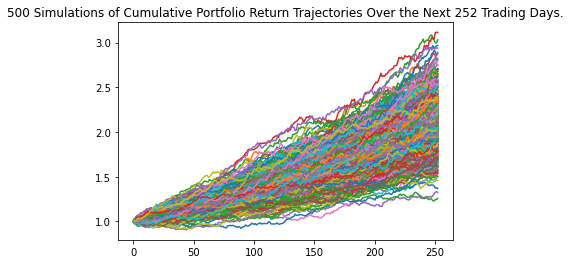

In [99]:
MC_green_agriculture_simulation_plot = MC_green_agriculture.plot_simulation()
MC_green_agriculture_simulation_plot.get_figure().savefig("MC_green_agriculture_one_year_simulation_plot.png", bbox_inches="tight")

In [100]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_green_agriculture.simulated_return.mean(axis=1)),
    "median": list(MC_green_agriculture.simulated_return.median(axis=1)),
    "min": list(MC_green_agriculture.simulated_return.min(axis=1)),
    "max": list(MC_green_agriculture.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

mean    median       min       max
0  1.000000  1.000000  1.000000  1.000000
1  1.003699  1.003295  0.975004  1.031039
2  1.006559  1.006895  0.970520  1.049607
3  1.010125  1.010113  0.951612  1.064497
4  1.012761  1.012466  0.944122  1.072668

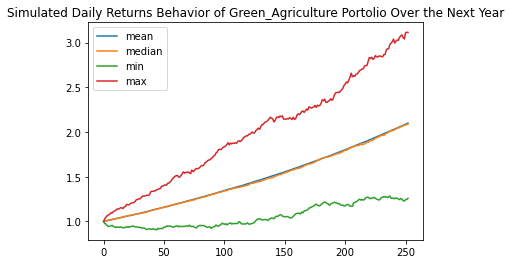

In [101]:
# Visually analyze the trajectory of green_agriculture portfolio daily returns on the next year of trading days simulation
simulated_returns_plot = df_simulated_returns.plot(title="Simulated Daily Returns Behavior of Green_Agriculture Portolio Over the Next Year")
simulated_returns_plot.get_figure().savefig("MC_green_agriculture_one_year.png", bbox_inches="tight")

In [102]:
# Progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl.head()

mean       median          min          max
0  1000.000000  1000.000000  1000.000000  1000.000000
1  1003.699319  1003.295077   975.003758  1031.038704
2  1006.558537  1006.894921   970.520408  1049.607057
3  1010.125348  1010.113172   951.612058  1064.497429
4  1012.761276  1012.466041   944.122477  1072.667746

In [103]:
# Summary statistics from the Monte Carlo simulation results
summary_statistics_green_agriculture = MC_green_agriculture.summarize_cumulative_return()

print(summary_statistics_green_agriculture)

count           500.000000
mean              2.099839
std               0.298732
min               1.258129
25%               1.887380
50%               2.089421
75%               2.278843
max               3.114164
95% CI Lower      1.566995
95% CI Upper      2.712263
Name: 252, dtype: float64


In [104]:
# Calculate the range of the possible outcomes within 95% CI of investments in green_agriculture portfolio
ci_lower = summary_statistics_green_agriculture[8]*initial_investment
ci_upper = summary_statistics_green_agriculture[9]*initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of $1,000 in the green_energy portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}.")

There is a 95% chance that an initial investment of $1,000 in the green_energy portfolio over the next year will end within in the range of $1,566.99 and $2,712.26.
